<IPython.core.display.Javascript object>


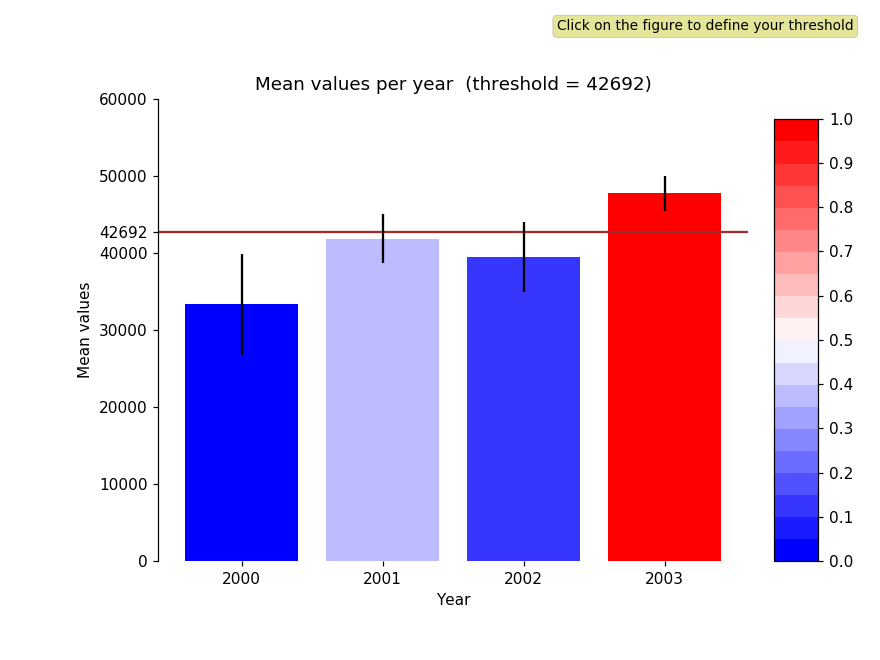

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib notebook
#==========data generation===============================
threshold = 40000
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# get the means and standard deviations
means = df.mean(axis=1)
std = df.std(axis=1)
n = df.shape[1]

## compute the 95% confidence intervals
#yerr = std/np.sqrt(n) * ss.t.ppf(1-0.05/2, n-1)
yerr= 1.96*std/np.sqrt(n)

#==============Functions================================

#Setup the plot
def plotting(threshold, color):
    ax.clear()
    bars=ax.bar(df.index, means, yerr = yerr,tick_label=['2000','2001','2002','2003'],color=color)                   
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean values')
    ax.set_title('Mean values per year  (threshold = {:.0f})'.format(threshold))
   
    # Add the horizontal line and add its value as a y-tick
    ax.axhline(y = threshold, zorder=1, color = 'brown')
    ytick = ax.get_yticks()
    ytick = np.append(ytick,threshold)
    ax.set_yticks(ytick)

def update_color(threshold,cmap):
#Computing each column against threshold value
    percentages = []
    for mean, yerr_ in zip(means, yerr):
        low = mean- yerr_
        high = mean+ yerr_
        proba = (high-threshold)/(high-low)
        #if proba>1: proba = 1
        #if proba<0: proba=0
        percentages.append(proba)
        color=cmap(percentages) #  percentage to rgba values
        plotting(threshold,color)    
        
def onclick(event):
    threshold=event.ydata
    update_color(threshold,cmap)
    
#============Visualization construction=====================
fig,ax= plt.subplots(figsize=(8,6))
fig.subplots_adjust(right=0.85,left=0.18,bottom=0.15,top=0.85)
#plt.tick_params(axis=x,bottom=False)
for loc in ['top', 'right','bottom']:
    ax.spines[loc].set_visible(False) 

##Setup the colormap
cmap = col.LinearSegmentedColormap.from_list("colormap",["b","white", "r"],20) # to set custom colormap
#cmap = cm.get_cmap('viridis_r', 10) # we can use also defined colormap

#add color bar
colorbar_axe=plt.axes([0.88, 0.15, 0.05, 0.67])  #The Axes instance in which the colorbar is drawn [0.85, 0.15, 0.04, 0.67]
cbar=mpl.colorbar.ColorbarBase(colorbar_axe,cmap=cmap, orientation='vertical')
cbar.set_ticks(np.arange(0.0,1.01,0.1))  

#===================initialization=======================================
threshold=0
update_color(threshold,cmap)

#get interaction y-data
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

#=======================add text========================================
props = dict(boxstyle='round', facecolor='y', alpha=0.4,linewidth=0.5,edgecolor='grey')
inst=plt.text(1.8,1.2,
          "Click on the figure to define your threshold",color="k", ha="right", va="baseline",zorder=1,
          bbox=props,fontsize=9)
    
